# Tic-Tac-Toe Q-Learning Visualization

This notebook visualizes the training progress and performance of the Q-learning agent.

In [1]:
import sys
sys.path.insert(0, '../src')

import matplotlib.pyplot as plt
from game import TicTacToe
from agent import QLearningAgent
from train import train_self_play, TrainingStats
from evaluate import evaluate_agent, analyze_q_table

## Train the Agent

First, let's train an agent and collect statistics.

In [2]:
# Create and train agent
agent = QLearningAgent(
    learning_rate=0.1,
    discount_factor=0.95,
    epsilon=1.0,
    epsilon_min=0.01,
    epsilon_decay=0.9995
)

# Train with statistics collection
stats = train_self_play(agent, num_episodes=50000, stats_interval=1000, verbose=True)

Episode   1000 | X wins: 59.1% | O wins: 28.8% | Draws: 12.1% | Epsilon: 0.606 | Q-table: 5946
Episode   2000 | X wins: 53.7% | O wins: 33.0% | Draws: 13.3% | Epsilon: 0.368 | Q-table: 9717
Episode   3000 | X wins: 55.6% | O wins: 23.9% | Draws: 20.5% | Epsilon: 0.223 | Q-table: 11263
Episode   4000 | X wins: 46.5% | O wins: 18.5% | Draws: 35.0% | Epsilon: 0.135 | Q-table: 11894
Episode   5000 | X wins: 30.3% | O wins: 10.6% | Draws: 59.1% | Epsilon: 0.082 | Q-table: 12136
Episode   6000 | X wins: 15.4% | O wins: 6.8% | Draws: 77.8% | Epsilon: 0.050 | Q-table: 12377
Episode   7000 | X wins: 9.4% | O wins: 6.3% | Draws: 84.3% | Epsilon: 0.030 | Q-table: 12488
Episode   8000 | X wins: 7.1% | O wins: 1.6% | Draws: 91.3% | Epsilon: 0.018 | Q-table: 12525
Episode   9000 | X wins: 2.7% | O wins: 0.9% | Draws: 96.4% | Epsilon: 0.011 | Q-table: 12527
Episode  10000 | X wins: 1.6% | O wins: 1.8% | Draws: 96.6% | Epsilon: 0.010 | Q-table: 12547
Episode  11000 | X wins: 1.8% | O wins: 1.7% | Draw

## Learning Curves

Visualize how the agent's win rates change over training.

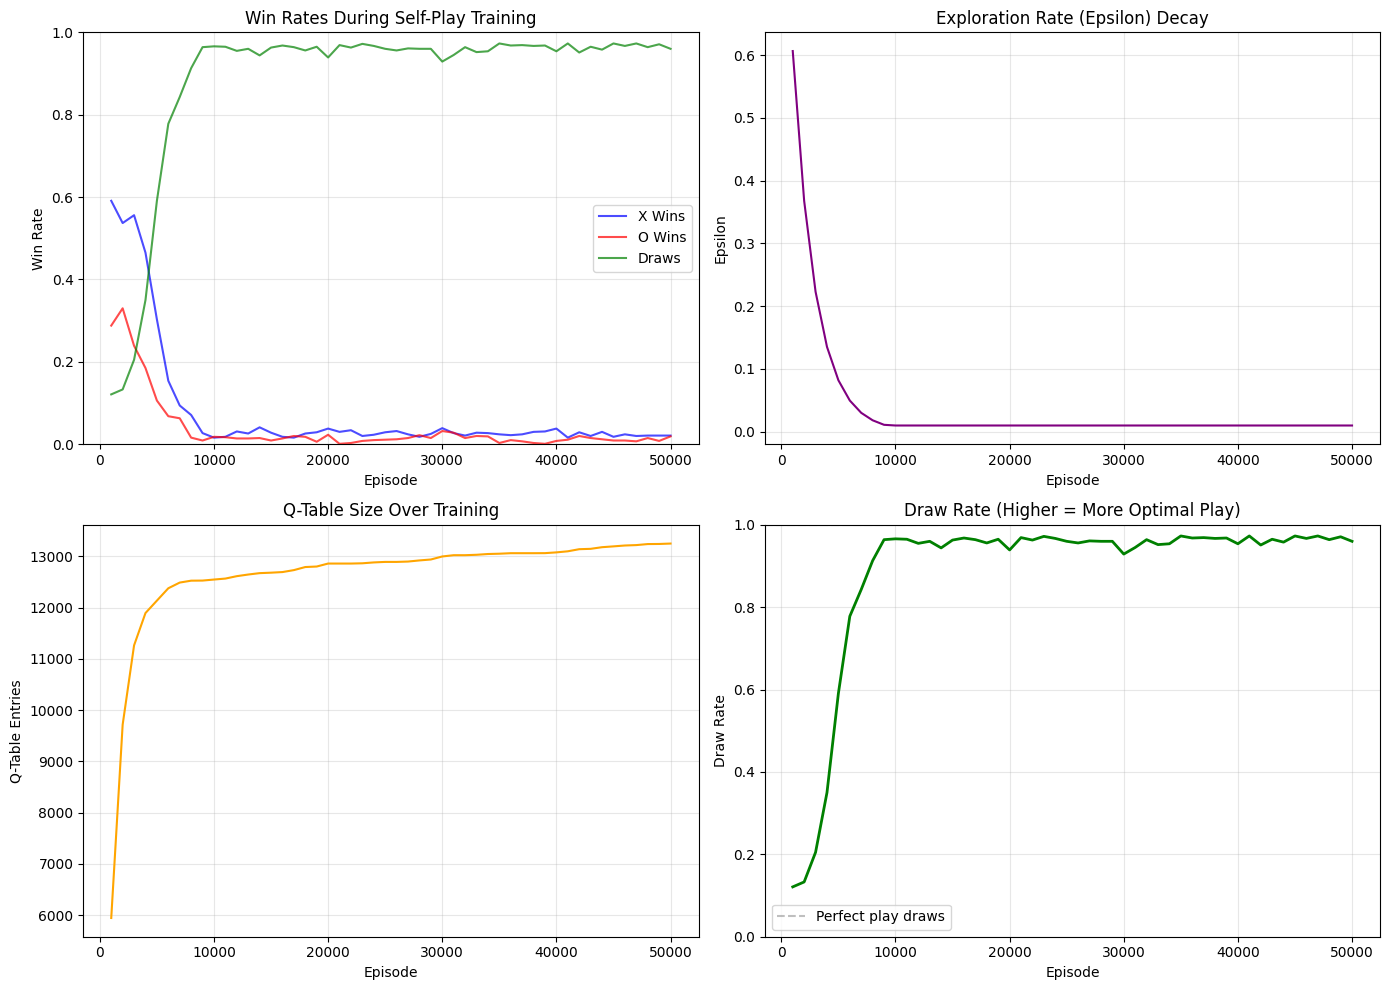

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Win rates over time
ax1 = axes[0, 0]
ax1.plot(stats.episodes, stats.x_wins, label='X Wins', color='blue', alpha=0.7)
ax1.plot(stats.episodes, stats.o_wins, label='O Wins', color='red', alpha=0.7)
ax1.plot(stats.episodes, stats.draws, label='Draws', color='green', alpha=0.7)
ax1.set_xlabel('Episode')
ax1.set_ylabel('Win Rate')
ax1.set_title('Win Rates During Self-Play Training')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0, 1)

# Epsilon decay
ax2 = axes[0, 1]
ax2.plot(stats.episodes, stats.epsilons, color='purple')
ax2.set_xlabel('Episode')
ax2.set_ylabel('Epsilon')
ax2.set_title('Exploration Rate (Epsilon) Decay')
ax2.grid(True, alpha=0.3)

# Q-table growth
ax3 = axes[1, 0]
ax3.plot(stats.episodes, stats.q_table_sizes, color='orange')
ax3.set_xlabel('Episode')
ax3.set_ylabel('Q-Table Entries')
ax3.set_title('Q-Table Size Over Training')
ax3.grid(True, alpha=0.3)

# Draw rate trend
ax4 = axes[1, 1]
ax4.plot(stats.episodes, stats.draws, color='green', linewidth=2)
ax4.axhline(y=1.0, color='gray', linestyle='--', alpha=0.5, label='Perfect play draws')
ax4.set_xlabel('Episode')
ax4.set_ylabel('Draw Rate')
ax4.set_title('Draw Rate (Higher = More Optimal Play)')
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.set_ylim(0, 1)

plt.tight_layout()
plt.savefig('../training_curves.png', dpi=150)
plt.show()

## Evaluation Against Opponents

Test the trained agent against different opponents.

In [4]:
# Evaluate against random
random_results = evaluate_agent(agent, 'random', num_games=1000)

print("=" * 50)
print("Performance vs Random Opponent (1000 games)")
print("=" * 50)
for role in ['as_x', 'as_o']:
    r = random_results[role]
    total = r['games']
    print(f"\n{role.replace('_', ' ').title()}:")
    print(f"  Wins: {r['wins']/total:.1%}")
    print(f"  Losses: {r['losses']/total:.1%}")
    print(f"  Draws: {r['draws']/total:.1%}")

Performance vs Random Opponent (1000 games)

As X:
  Wins: 90.4%
  Losses: 2.0%
  Draws: 7.6%

As O:
  Wins: 80.2%
  Losses: 6.8%
  Draws: 13.0%


In [5]:
# Evaluate against minimax (optimal opponent)
minimax_results = evaluate_agent(agent, 'minimax', num_games=100)

print("=" * 50)
print("Performance vs Optimal (Minimax) Opponent (100 games)")
print("=" * 50)
for role in ['as_x', 'as_o']:
    r = minimax_results[role]
    total = r['games']
    print(f"\n{role.replace('_', ' ').title()}:")
    print(f"  Wins: {r['wins']/total:.1%}")
    print(f"  Losses: {r['losses']/total:.1%}")
    print(f"  Draws: {r['draws']/total:.1%}")

print("\nNote: Against a perfect opponent, the best possible result is 100% draws.")

Performance vs Optimal (Minimax) Opponent (100 games)

As X:
  Wins: 0.0%
  Losses: 0.0%
  Draws: 100.0%

As O:
  Wins: 0.0%
  Losses: 0.0%
  Draws: 100.0%

Note: Against a perfect opponent, the best possible result is 100% draws.


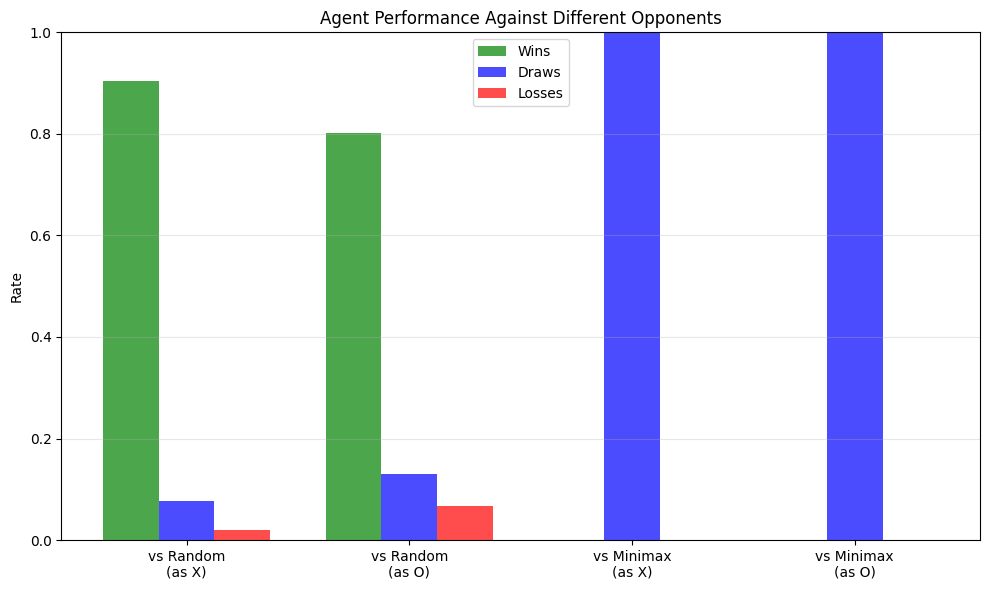

In [6]:
# Bar chart comparison
fig, ax = plt.subplots(figsize=(10, 6))

labels = ['vs Random\n(as X)', 'vs Random\n(as O)', 'vs Minimax\n(as X)', 'vs Minimax\n(as O)']
wins = [
    random_results['as_x']['wins'] / random_results['as_x']['games'],
    random_results['as_o']['wins'] / random_results['as_o']['games'],
    minimax_results['as_x']['wins'] / minimax_results['as_x']['games'],
    minimax_results['as_o']['wins'] / minimax_results['as_o']['games']
]
draws = [
    random_results['as_x']['draws'] / random_results['as_x']['games'],
    random_results['as_o']['draws'] / random_results['as_o']['games'],
    minimax_results['as_x']['draws'] / minimax_results['as_x']['games'],
    minimax_results['as_o']['draws'] / minimax_results['as_o']['games']
]
losses = [
    random_results['as_x']['losses'] / random_results['as_x']['games'],
    random_results['as_o']['losses'] / random_results['as_o']['games'],
    minimax_results['as_x']['losses'] / minimax_results['as_x']['games'],
    minimax_results['as_o']['losses'] / minimax_results['as_o']['games']
]

x = range(len(labels))
width = 0.25

ax.bar([i - width for i in x], wins, width, label='Wins', color='green', alpha=0.7)
ax.bar(x, draws, width, label='Draws', color='blue', alpha=0.7)
ax.bar([i + width for i in x], losses, width, label='Losses', color='red', alpha=0.7)

ax.set_ylabel('Rate')
ax.set_title('Agent Performance Against Different Opponents')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_ylim(0, 1)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../evaluation_results.png', dpi=150)
plt.show()

## Q-Table Analysis

Examine the learned Q-values.

In [7]:
analysis = analyze_q_table(agent)

print("Q-Table Statistics")
print("=" * 40)
for key, value in analysis.items():
    if isinstance(value, float):
        print(f"{key}: {value:.4f}")
    else:
        print(f"{key}: {value}")

Q-Table Statistics
total_entries: 13379
unique_states: 4030
q_value_min: -0.9984
q_value_max: 0.9983
q_value_mean: 0.0006
positive_q_count: 3510
negative_q_count: 4598
zero_q_count: 5271


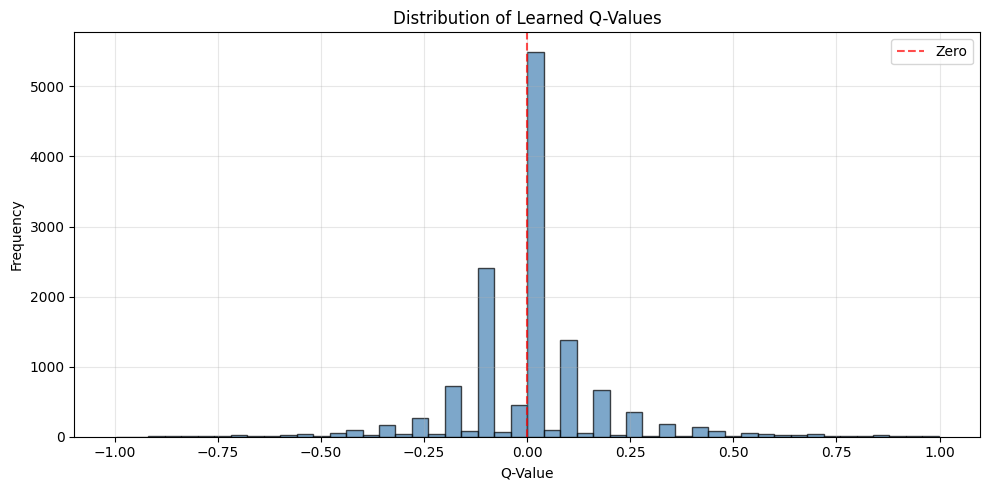

In [8]:
# Distribution of Q-values
q_values = list(agent.q_table.values())

fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(q_values, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
ax.axvline(x=0, color='red', linestyle='--', alpha=0.7, label='Zero')
ax.set_xlabel('Q-Value')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Learned Q-Values')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../q_value_distribution.png', dpi=150)
plt.show()

## Save the Trained Agent

In [9]:
# Save the agent
agent.save('../trained_agent.json')
print("Agent saved to ../trained_agent.json")
print(f"\nYou can now play against it by running: python src/play.py")

Agent saved to ../trained_agent.json

You can now play against it by running: python src/play.py
